# Lab: Titanic Survival Exploration with Decision Trees

## Getting Started
In this lab, you will see how decision trees work by implementing a decision tree in sklearn.

We'll start by loading the dataset and displaying some of its rows.

In [58]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
# Pretty display for notebooks
%matplotlib inline

# Set a random seed
import random
random.seed(42)

# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Recall that these are the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code cell below to remove **Survived** as a feature of the dataset and store it in `outcomes`.

In [19]:
full_data.shape

(891, 12)

In [20]:
full_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
full_data['Ticket'].nunique()

681

In [23]:
# Removing the names
full_data_cleaned= full_data.drop(['Name', 'PassengerId' , 'Cabin' , 'Ticket'],axis=1)
full_data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [41]:
full_data_cleaned['Age'] =full_data_cleaned['Age'].fillna(full_data_cleaned['Age'].mean().round())
full_data_cleaned['Embarked'] =full_data_cleaned['Embarked'].fillna(full_data_cleaned['Embarked'].mode()[0])
full_data_cleaned.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [42]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data_cleaned['Survived']
features_raw = full_data_cleaned.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(features_raw.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


The very same sample of the RMS Titanic data now shows the **Survived** feature removed from the DataFrame. Note that `data` (the passenger data) and `outcomes` (the outcomes of survival) are now *paired*. That means for any passenger `data.loc[i]`, they have the survival outcome `outcomes[i]`.

## Preprocessing the data

Now, let's do some data preprocessing. First, we'll remove the names of the passengers, and then one-hot encode the features.

One-Hot encoding is useful for changing over categorical data into numerical data, with each different option within a category changed into either a 0 or 1 in a separate *new* category as to whether it is that option or not (e.g. Queenstown port or not Queenstown port). Check out [this article](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) before continuing.

**Question:** Why would it be a terrible idea to one-hot encode the data without removing the names?

In [44]:
####it will make an encoded column for each name 

In [47]:
# One-hot encoding
features = pd.get_dummies(features_raw , drop_first=True).astype(int)

In [49]:
features.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22,1,0,7,1,0,1
1,1,38,1,0,71,0,0,0
2,3,26,0,0,7,0,0,1
3,1,35,1,0,53,0,0,1
4,3,35,0,0,8,1,0,1


And now we'll fill in any blanks with zeroes.

In [ ]:
# features = features.fillna(0.0)
# display(features.head())

## visualization

In [53]:
vis_df = features.copy()

vis_df['outcomes'] =outcomes
vis_df.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,outcomes
0,3,22,1,0,7,1,0,1,0
1,1,38,1,0,71,0,0,0,1
2,3,26,0,0,7,0,0,1,1


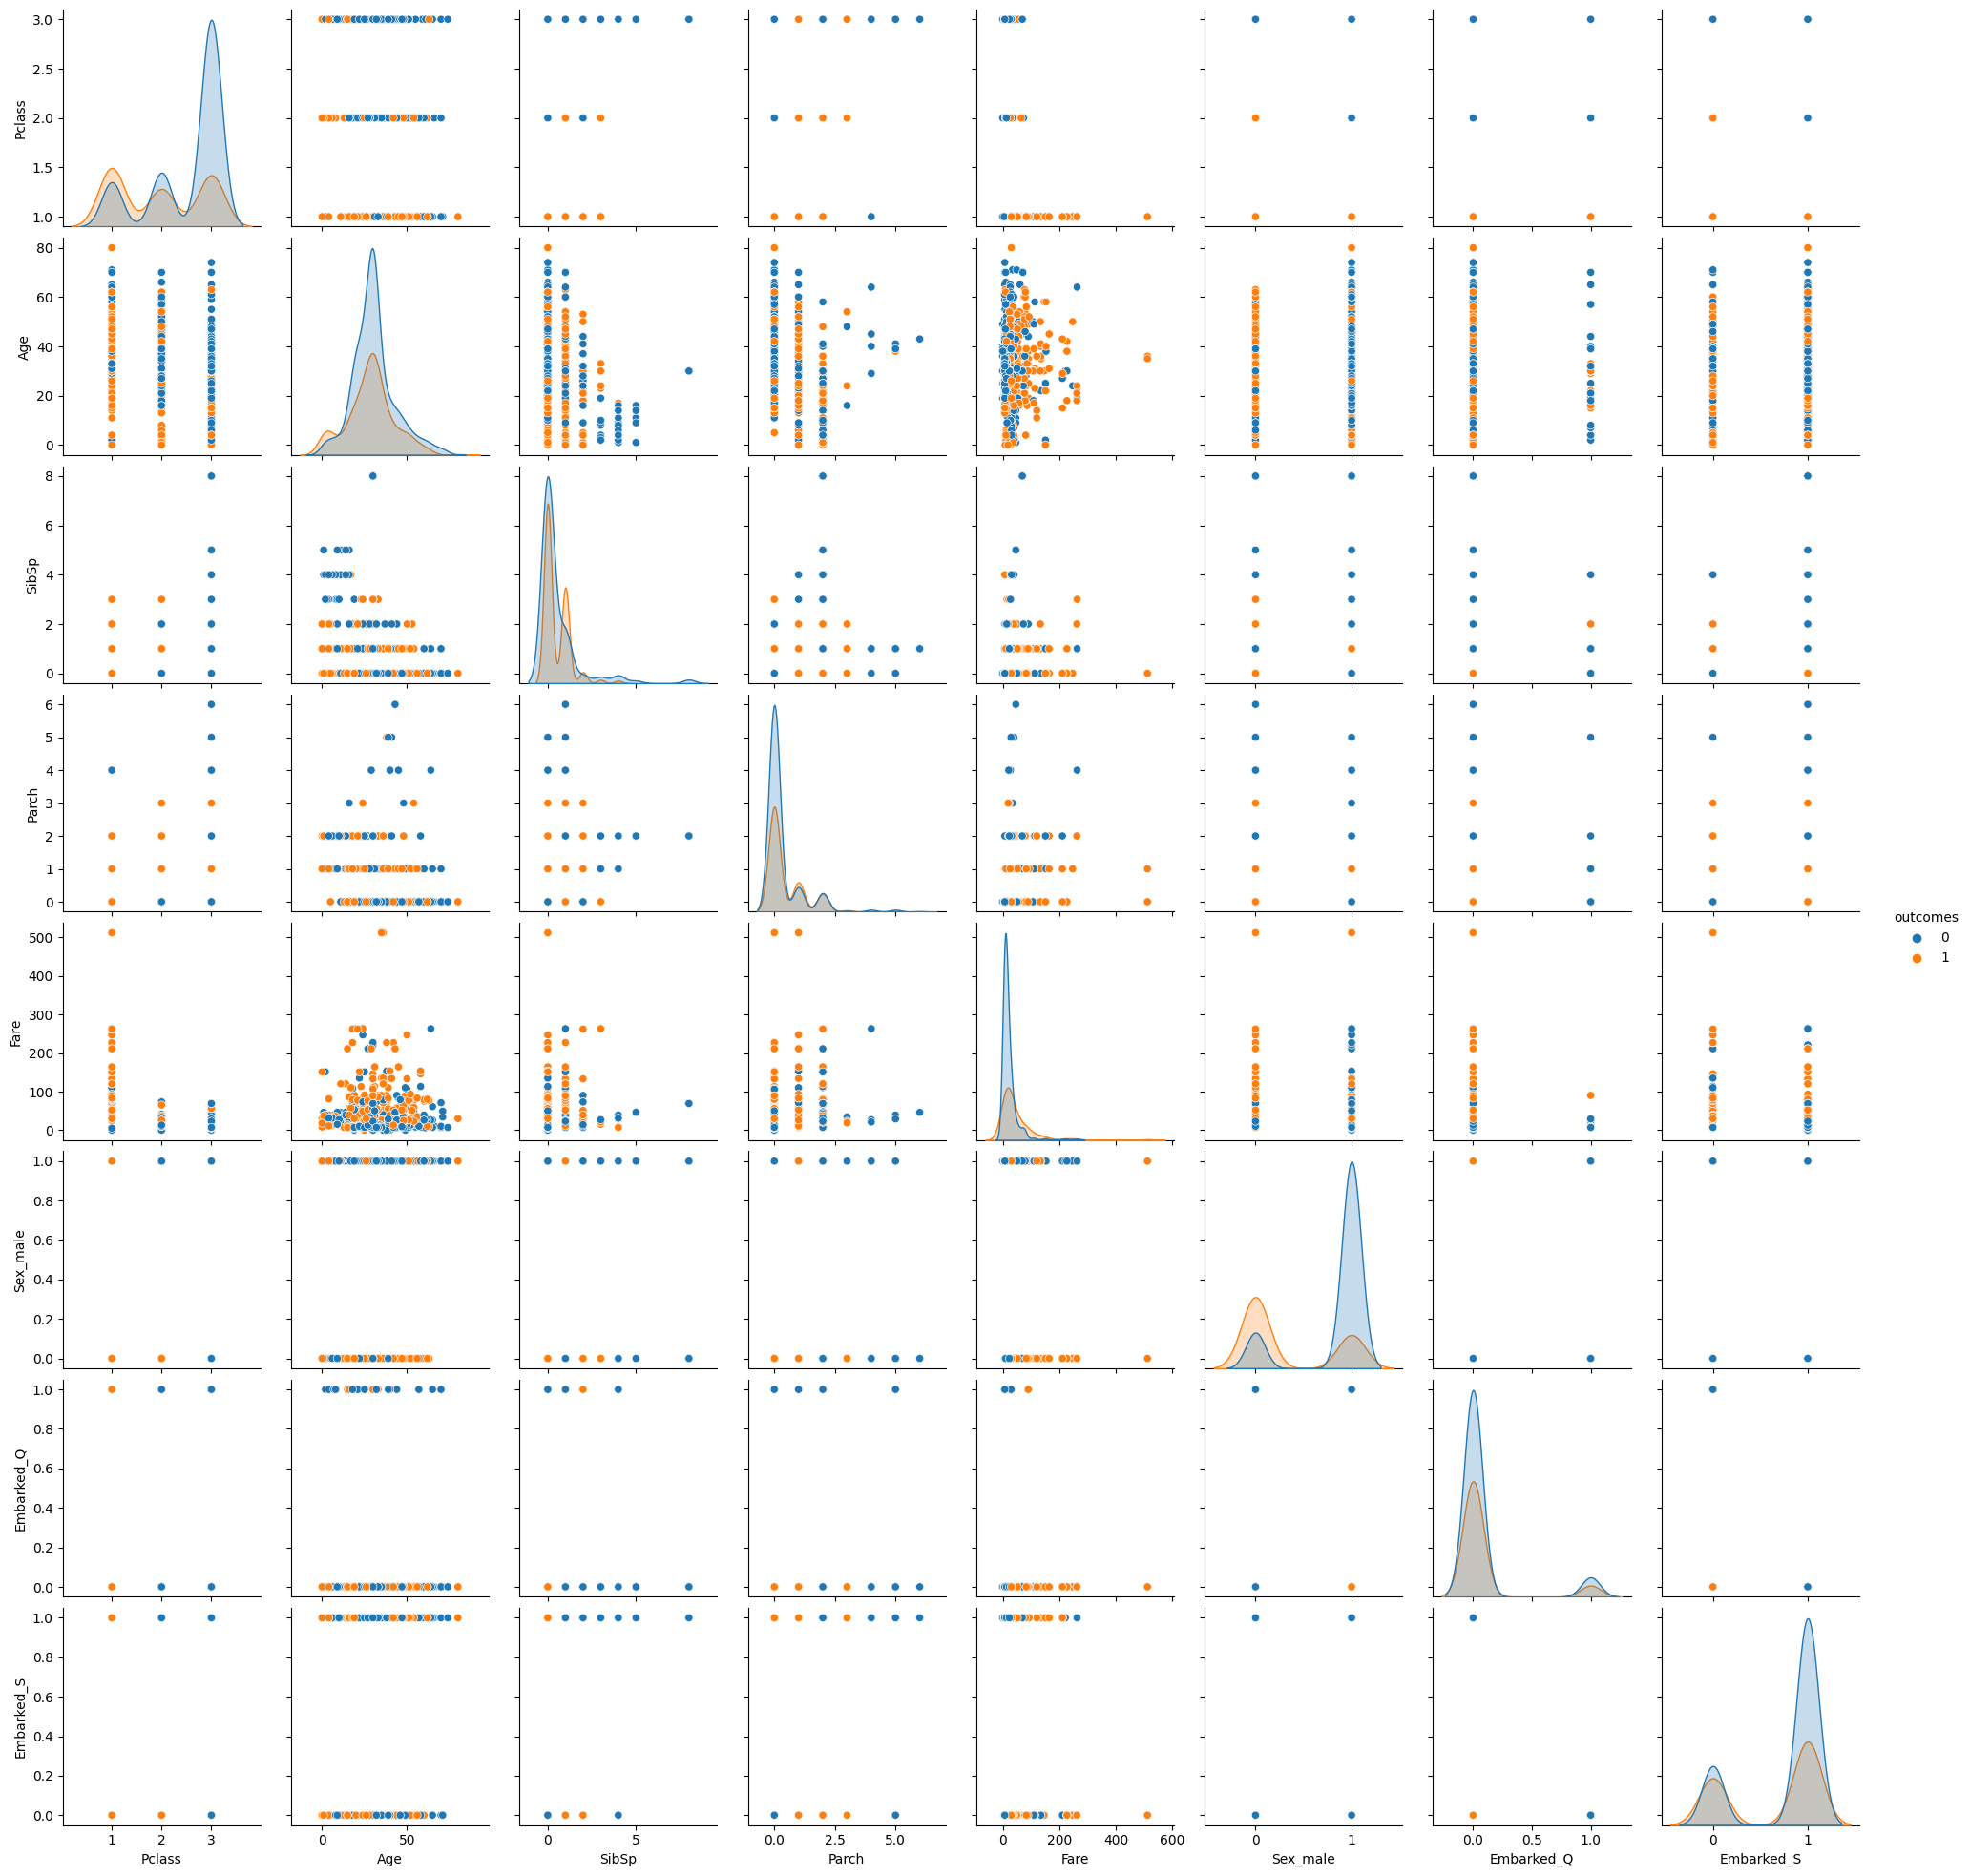

In [57]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.pairplot(data=vis_df , hue= 'outcomes')


<Axes: xlabel='Pclass', ylabel='Sex_male'>

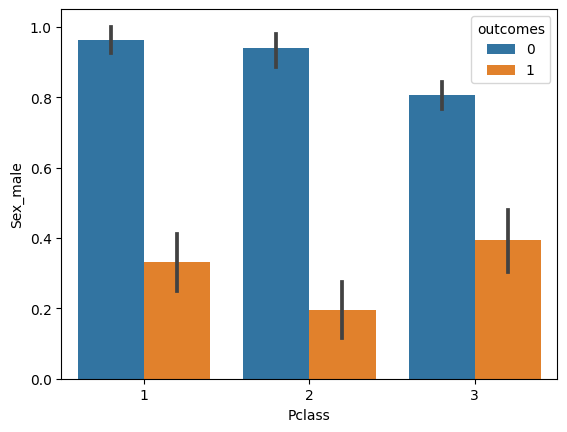

In [59]:
sns.barplot(data= vis_df , x = 'Pclass' , y ='Sex_male',hue='outcomes')

## (TODO) Training the model

Now we're ready to train a model in sklearn. First, let's split the data into training and testing sets. Then we'll train the model on the training set.

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)

In [65]:
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# TODO: Define the classifier, and fit it to the data
model = DecisionTreeClassifier()
model.fit(X_train , y_train)

DecisionTreeClassifier()

## Testing the model
Now, let's see how our model does, let's calculate the accuracy over both the training and the testing set.

In [66]:
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.9620786516853933
The test accuracy is 0.7932960893854749


# Exercise: Improving the model

Ok, high training accuracy and a lower testing accuracy. We may be overfitting a bit.

So now it's your turn to shine! Train a new model, and try to specify some parameters in order to improve the testing accuracy, such as:
- `max_depth`
- `min_samples_leaf`
- `min_samples_split`


**Challenge:** Try to get to 85% accuracy on the testing set.

In [135]:
# TODO: Train the model
min_samples_leaf =list(range(1,10))
# TODO: Make predictions

train_list=[]
test_list=[]
for i in min_samples_leaf:
    
    
    model = DecisionTreeClassifier(criterion='entropy' , min_samples_leaf=i )
    model.fit(X_train , y_train)
    # TODO: Calculate the accuracy
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate the accuracy
    
    from sklearn.metrics import accuracy_score
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_list.append(train_accuracy)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_list.append(test_accuracy)


In [136]:
print('The training accuracy is', max(train_list))
print('The test accuracy is', max(test_list))

The training accuracy is 0.9620786516853933
The test accuracy is 0.8547486033519553


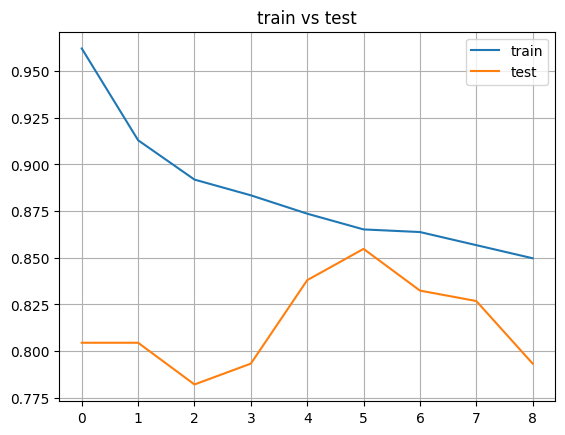

In [144]:
plt.plot(train_list ,label='train')
plt.plot(test_list , label= 'test')
plt.title("train vs test")
plt.legend()
plt.grid()
plt.show()